# Lecture03 - Wind waves

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b> wave length, wave period, wave speed, sea wave vs swell, significant wave height, wave spectrum,  wave generation and prediction
</div>

Before class:
- Read news about Hurricane Kiko that is happening now! [Hurricane Kiko may bring life-threatening waves to Hawaii](https://www.nbcnews.com/weather/hurricanes/hurricane-kiko-latest-rcna229622)

After class:
- Assignment02.ipynb (due 09/15/2025 23:59PM)
- Watch video, read waves and possibly learn surfing? [How to Catch More Waves with Less Effort | Positioning](https://www.youtube.com/watch?v=r9Pc-9N-v-Q)
  
Reference:

- Textbook chapter 4, skip 4.3.2
- optional: Textbook 4.4.2


## 1. Wave Characteristics

### 1) basics
The surface elevation 𝜂 of a plane wave can be described by: $\eta=a \sin(\sigma t-kx)$,\
where $a$ is the wave amplitude, wave height $H=2a$,\
$\sigma$ is the angular frequency (or radian frequency, unit=rad/s) and $k$ is the wavenumber,\
wave period and wave length are $T=\frac{2\pi}{\sigma}$ and $L=\frac{2\pi}{k}$,\
We can define the variable phase of the wave as $\theta=\sigma t-kx$\
We define the phase speed or celerity to be the speed of propagation of phase in the direction
of the wave vector $c=\frac{L}{T}=\frac{\sigma}{k}$.

In [1]:
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install netcdf4
# !pip install xarray
# !pip install numpy
# !pip install matplotlib
# !pip install ipympl
# # resetart kernel
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

In [2]:
# # to enable the jupyter widgets so that you can plot interactive figures
# from google.colab import output
# output.enable_custom_widget_manager()

In [3]:
# import python libraries
import xarray as xr
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib widget 

a = 0.1 # wave amplitude, unit: m
sigma = 0.1 #wave frequency, unit: rad/s, To convert from revolutions per second to radians per second, multiply by 2π
k = 1 # wavenumber, unit: rad/n

t = np.arange(0, 1000) # define time range, unit: s
x = np.arange(-100, 100, .1) # define space range, unit: m
eta = np.zeros((len(t), len(x)))

for i in range(len(t)):
    for j in range(len(x)):
        eta[i,j] = a*np.sin(sigma*t[i] - k*x[j]) # calculate surface elevation for wave

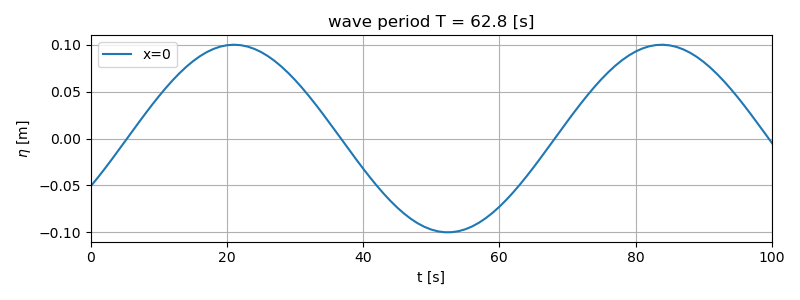

In [4]:
# plot wave at x=x0; see temporal variation at one location
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ax.plot(t, eta[:,0], label = 'x=0')
# ax.plot(t, eta[:,2], label = 't=2')
ax.set_xlabel('t [s]')
ax.set_ylabel(r'$\eta$ [m]')
ax.set_xlim([0,100])
ax.legend()
ax.set_title(f'wave period T = {np.round(2*np.pi/sigma,1)} [s]') # wave period, unit: s
ax.grid(True)
plt.tight_layout()

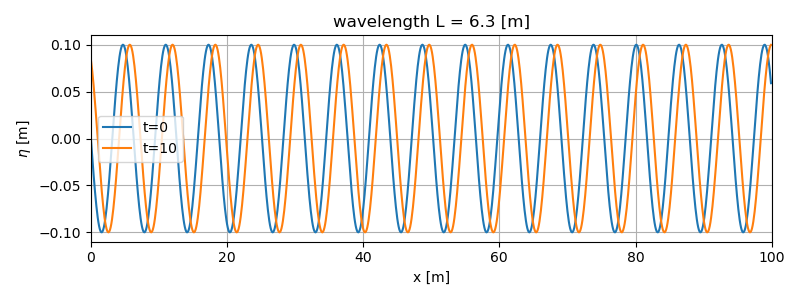

In [5]:
# plot wave at t=t1, t=t2; see wave propagation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ax.plot(x, eta[0,:], label = 't=0')
ax.plot(x, eta[10,:], label = 't=10')
ax.set_xlim([0,100])
ax.set_xlabel('x [m]')
ax.set_ylabel(r'$\eta$ [m]')
ax.legend()
ax.set_title(f'wavelength L = {np.round(2*np.pi/k,1)} [m]') # wave length, unit: m
ax.grid(True)
plt.tight_layout()

In [6]:
# this is just a fancy moving version of the previous plot, no need to study the code

from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='t=',
    value=0,
    min=0,
    max=1000
)

slider.layout.margin = '0px 30% 0px 5%'
slider.layout.width = '60%'

fig = plt.figure(figsize=(8,3))
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title(r'$\eta$=a*sin($\sigma$t-kx) at t={} s'.format(np.round(slider.value,1)))
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel(r'$\eta$ [m]')
plt.xlim([0,100])
plt.ylim([-.12, .12])
plt.tight_layout()

lines = plt.plot(x, a*np.sin(sigma*slider.value - k*x)) 
    
def update_lines(change):
    plt.title(r'$\eta$=a*sin($\sigma$t-kx) at t={} s'.format(np.round(change.new,1)))
    lines[0].set_data(x, a*np.sin(sigma*change.new - k*x)) 
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)


AppLayout(children=(FloatSlider(value=0.0, description='t=', layout=Layout(grid_area='footer', margin='0px 30%…

### 2) wave dispersion
**Wave dispersion** refers to the phenomenon where the phase velocity of a wave changes with its frequency or wavelength. 

In [7]:
# import python libraries
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib widget 

a = 0.1 # wave amplitude, unit: m
sigma1 = 0.1 #wave frequency, unit: rad/s, To convert from revolutions per second to radians per second, multiply by 2π
k1 = 1 # wavenumber, unit: rad/n
dk = .2
dsigma = .05
k2 = k1 + dk #define wave number and wave frequency of wave 2
sigma2 = sigma1 + dsigma

t = np.arange(0, 1000) # define time range, unit: s
x = np.arange(-100, 100, 0.1) # define space range, unit: m
eta1 = np.zeros((len(t), len(x)))
eta2 = np.zeros((len(t), len(x)))

for i in range(len(t)):
    for j in range(len(x)):
        eta1[i,j] = a*np.sin(sigma1*t[i] - k1*x[j]) # calculate surface elevation for wave1
        eta2[i,j] = a*np.sin(sigma2*t[i] - k2*x[j]) # calculate surface elevation for wave2

In [8]:
# compute and show wave period and phase speed for wave 1
T1 = 2*np.pi/sigma1
c1 = sigma1/k1
T1, c1

(62.83185307179586, 0.1)

In [9]:
# compute and show wave period and phase speed for wave 2
T2 = 2*np.pi/sigma2
c2 = sigma2/k2
T2, c2

(41.8879020478639, 0.12500000000000003)

In [10]:
# this is just a fancy moving version of the previous plot, no need to study the code

from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='t=',
    value=0,
    min=0,
    max=800
)

slider.layout.margin = '0px 30% 0px 5%'
slider.layout.width = '60%'

fig = plt.figure(figsize=(8,3))
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title(r'$\eta1$ and $\eta2$ at t={} s'.format(np.round(slider.value,1)))
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel(r'$\eta$ [m]')
plt.xlim([0,100])
plt.ylim([-.12, .12])
plt.tight_layout()

# only show wave propagation from x=0, t=0
mask1 = np.where(x<=c1*slider.value)
mask2 = np.where(x<=c2*slider.value)
lines1 = plt.plot(x[mask1], a*np.sin(sigma1*slider.value - k1*x[mask1]))
lines2 = plt.plot(x[mask2], a*np.sin(sigma2*slider.value - k2*x[mask2]))

def update_lines(change):
    plt.title(r'$\eta1$ and $\eta2$ at t={} s'.format(np.round(change.new,1)))
    mask1 = np.where(x<=c1*change.new)
    mask2 = np.where(x<=c2*change.new)
    lines1[0].set_data(x[mask1], a*np.sin(sigma1*change.new - k1*x[mask1]))
    lines2[0].set_data(x[mask2], a*np.sin(sigma2*change.new - k2*x[mask2]))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)


AppLayout(children=(FloatSlider(value=0.0, description='t=', layout=Layout(grid_area='footer', margin='0px 30%…

### 3) wave packet/envolope

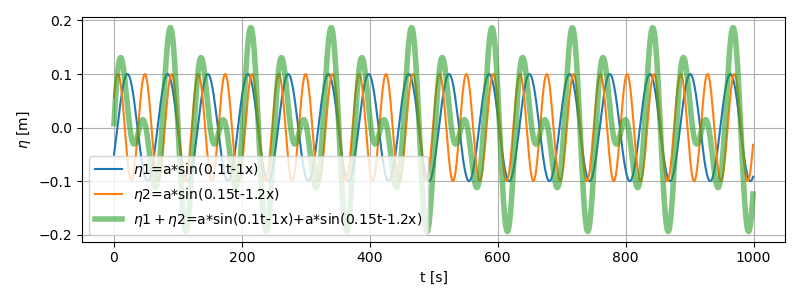

In [11]:
# plot wave at x=x0; see temporal variation at the same location for two waves of different frequency and the "wave packet"
plt.ion()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ax.plot(t, eta1[:,0], label = r'$\eta1$'+f'=a*sin({np.round(sigma1,2)}t-{k1}x)')
ax.plot(t, eta2[:,0], label = r'$\eta2$'+f'=a*sin({np.round(sigma2,2)}t-{k2}x)')
ax.plot(t, eta1[:,0]+ eta2[:,0], label = r'$\eta1+\eta2$'+f'=a*sin({np.round(sigma1,2)}t-{k1}x)+a*sin({np.round(sigma2,2)}t-{k2}x)', linewidth = 4, alpha = .6)
ax.set_xlabel('t [s]')
ax.set_ylabel(r'$\eta$ [m]')
ax.legend()
ax.grid(True)
plt.tight_layout()

In [12]:
dT = 2*np.pi/dsigma
dT

125.66370614359172

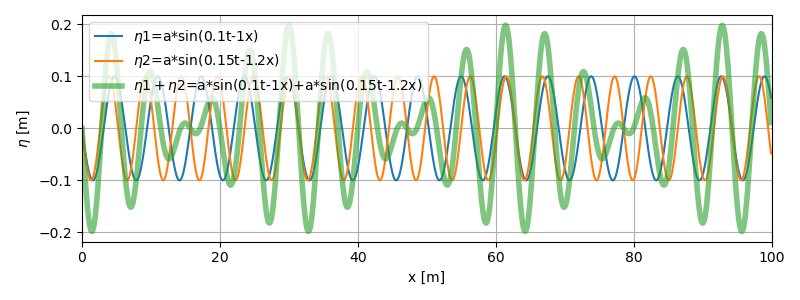

In [13]:
# plot wave at t=t0; see spatial variation at the same location for two waves of different frequency and the "wave packet"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ax.plot(x, eta1[0,:], label = r'$\eta1$'+f'=a*sin({np.round(sigma1,2)}t-{k1}x)')
ax.plot(x, eta2[0,:], label = r'$\eta2$'+f'=a*sin({np.round(sigma2,2)}t-{k2}x)')
ax.plot(x, eta1[0,:]+ eta2[0,:], label = r'$\eta1+\eta2$'+f'=a*sin({np.round(sigma1,2)}t-{k1}x)+a*sin({np.round(sigma2,2)}t-{k2}x)', linewidth = 4, alpha = .6)
ax.set_xlim([0,100])
ax.set_xlabel('x [m]')
ax.set_ylabel(r'$\eta$ [m]')
ax.legend()
ax.grid(True)
plt.tight_layout()

In [14]:
dL = 2*np.pi/dk
dL

31.41592653589793

### 4) group velocity vs phase velocity

While the phase velocity represents the propagation of phase (signal), the group velocity is associated with the speed of energy propagation.

#### a. $c_g>0$, $c>0$; $c_g\neq c$

In [15]:
# compute group speed cg = dL/dT = dsigma/dk
cg = dsigma/dk
print(f"cg = {cg}, c1 = {c1}, c2 = {c2} [m/s]")

cg = 0.25, c1 = 0.1, c2 = 0.12500000000000003 [m/s]


In [16]:
# this is just a fancy moving version of the previous plot, no need to study the code

from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='t=',
    value=0,
    min=0,
    max=800
)

slider.layout.margin = '0px 30% 0px 5%'
slider.layout.width = '60%'

fig = plt.figure(figsize=(8,3))
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title(r'at t={} s'.format(np.round(slider.value,1)))
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel(r'$\eta$ [m]')
plt.xlim([0,100])
plt.ylim([-.22, .22])
plt.tight_layout()

# only show wave propagation from x=0, t=0
mask1 = np.where(x<=c1*slider.value)
mask2 = np.where(x<=c2*slider.value)
lines1 = plt.plot(x[mask1], a*np.sin(sigma1*slider.value - k1*x[mask1]), label=r'$\eta1$')
lines2 = plt.plot(x[mask2], a*np.sin(sigma2*slider.value - k2*x[mask2]), label=r'$\eta2$')
# wave group
mask = np.where(x<=cg*slider.value)
lines = plt.plot(x[mask], a*np.sin(sigma1*slider.value - k1*x[mask]) + a*np.sin(sigma2*slider.value - k2*x[mask]), linewidth = 4, alpha = .6, label=r'$\eta1+\eta2$')
plt.legend(loc='upper right')

def update_lines(change):
    plt.title(r'at t={} s'.format(np.round(change.new,1)))
    mask1 = np.where(x<=c1*change.new)
    mask2 = np.where(x<=c2*change.new)
    lines1[0].set_data(x[mask1], a*np.sin(sigma1*change.new - k1*x[mask1]))
    lines2[0].set_data(x[mask2], a*np.sin(sigma2*change.new - k2*x[mask2]))
    mask= np.where(x<=cg*change.new)
    lines[0].set_data(x[mask], a*np.sin(sigma1*change.new - k1*x[mask]) + a*np.sin(sigma2*change.new - k2*x[mask]))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)


AppLayout(children=(FloatSlider(value=0.0, description='t=', layout=Layout(grid_area='footer', margin='0px 30%…

#### b. $c_g>0$, $c>0$; $c_g = c$

In [17]:
# In this example, we reset dsigma and dk so that c1 = c2
dk = .2
dsigma = .02 # instead of .05 in the previous example
k2 = k1 + dk #define wave number and wave frequency of wave 2
sigma2 = sigma1 + dsigma
c2 = sigma2/k2

# compute group speed cg = dL/dT = dsigma/dk
cg = dsigma/dk
print(f"cg = {cg}, c1 = {c1}, c2 = {c2} [m/s]")

cg = 0.09999999999999999, c1 = 0.1, c2 = 0.1 [m/s]


In [18]:
# this is just a fancy moving version of the previous plot, no need to study the code

from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='t=',
    value=0,
    min=0,
    max=800
)

slider.layout.margin = '0px 30% 0px 5%'
slider.layout.width = '60%'

fig = plt.figure(figsize=(8,3))
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title(r'at t={} s'.format(np.round(slider.value,1)))
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel(r'$\eta$ [m]')
plt.xlim([0,100])
plt.ylim([-.22, .22])
plt.tight_layout()

# only show wave propagation from x=0, t=0
mask1 = np.where(x<=c1*slider.value)
mask2 = np.where(x<=c2*slider.value)
lines1 = plt.plot(x[mask1], a*np.sin(sigma1*slider.value - k1*x[mask1]), label=r'$\eta1$')
lines2 = plt.plot(x[mask2], a*np.sin(sigma2*slider.value - k2*x[mask2]), label=r'$\eta2$')
# wave group
mask = np.where(x<=cg*slider.value)
lines = plt.plot(x[mask], a*np.sin(sigma1*slider.value - k1*x[mask]) + a*np.sin(sigma2*slider.value - k2*x[mask]), linewidth = 4, alpha = .6, label=r'$\eta1+\eta2$')
plt.legend(loc='upper right')

def update_lines(change):
    plt.title(r'at t={} s'.format(np.round(change.new,1)))
    mask1 = np.where(x<=c1*change.new)
    mask2 = np.where(x<=c2*change.new)
    lines1[0].set_data(x[mask1], a*np.sin(sigma1*change.new - k1*x[mask1]))
    lines2[0].set_data(x[mask2], a*np.sin(sigma2*change.new - k2*x[mask2]))
    mask= np.where(x<=cg*change.new)
    lines[0].set_data(x[mask], a*np.sin(sigma1*change.new - k1*x[mask]) + a*np.sin(sigma2*change.new - k2*x[mask]))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)


AppLayout(children=(FloatSlider(value=0.0, description='t=', layout=Layout(grid_area='footer', margin='0px 30%…

#### c. $c_g<0$, $c>0$; $c_g\neq c$

In [19]:
# Let's look at another example, where we set dsigma<0, dk>0 and recalculate eta2
dk = .2
dsigma = -.05 # instead of .05 in the previous example
k2 = k1 + dk #define wave number and wave frequency of wave 2
sigma2 = sigma1 + dsigma
c2 = sigma2/k2

# now let's compute group speed cg = dsigma/dk, note that this time cg<0, in which direction will the wave packet move?
cg = dsigma/dk
print(f"cg = {cg}, c1 = {c1}, c2 = {c2} [m/s]")

cg = -0.25, c1 = 0.1, c2 = 0.04166666666666667 [m/s]


In [20]:
# this is just a fancy moving version of the previous plot, no need to study the code

from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='t=',
    value=0,
    min=0,
    max=800
)

slider.layout.margin = '0px 30% 0px 5%'
slider.layout.width = '60%'

fig = plt.figure(figsize=(8,3))
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title(r'at t={} s'.format(np.round(slider.value,1)))
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel(r'$\eta$ [m]')
plt.xlim([-100,100])
plt.ylim([-.22, .22])
plt.tight_layout()

# only show wave propagation from x=0, t=0
mask1 = np.where(x<=c1*slider.value)
mask2 = np.where(x<=c2*slider.value)
lines1 = plt.plot(x[mask1], a*np.sin(sigma1*slider.value - k1*x[mask1]), label=r'$\eta1$')
lines2 = plt.plot(x[mask2], a*np.sin(sigma2*slider.value - k2*x[mask2]), label=r'$\eta2$')
# wave group
mask = np.where(x<=cg*slider.value)
lines = plt.plot(x[mask], a*np.sin(sigma1*slider.value - k1*x[mask]) + a*np.sin(sigma2*slider.value - k2*x[mask]), linewidth = 4, alpha = .6, label=r'$\eta1+\eta2$')
plt.legend(loc='upper right')

def update_lines(change):
    plt.title(r'at t={} s'.format(np.round(change.new,1)))
    mask1 = np.where(x<=c1*change.new)
    mask2 = np.where(x<=c2*change.new)
    lines1[0].set_data(x[mask1], a*np.sin(sigma1*change.new - k1*x[mask1]))
    lines2[0].set_data(x[mask2], a*np.sin(sigma2*change.new - k2*x[mask2]))
    mask= np.where(x<=cg*change.new)
    lines[0].set_data(x[mask], a*np.sin(sigma1*change.new - k1*x[mask]) + a*np.sin(sigma2*change.new - k2*x[mask]))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)


AppLayout(children=(FloatSlider(value=0.0, description='t=', layout=Layout(grid_area='footer', margin='0px 30%…

<font size="5" color="blue">The wave packet doesn't have to move in the same direction as individual wave constituants! CRAZY!!!</font> 

### 5) dispersion relation
**Dispersion relationship $\sigma(k)$** is essentially the relationship between wave frequency $\sigma$ and wave number $k$. 

> $c = \sigma/k$ (phase speed)
> $c_g = \frac{\partial\sigma}{\partial k}$  (group speed)

**Non-dispersive waves** are waves where the phase speed of the wave is the same for all frequencies or wavelengths. In other words, the shape of a wave packet (a group of waves) doesn't change as it propagates through a non-dispersive medium. This means the group velocity (speed of the wave packet) is equal to the phase velocity (speed of individual waves within the packet): 
>**$c=c_g$**

If wave components *do not* have the same phase speed, then the waves are called **dispersive**. In this case, a pulse will break up. Very long waves and very short waves will form low amplitude trailing edges, and the bulk of the energy from the generation event will travel at a speed called the group speed.  
>**$c\neq c_g$**


## 2. Wind-generated waves

Let's watch [<font size="5">video</font>](../figures/lecture03/Polar_heavy_seas.720p.webm) of wind waves experienced by RV Knorr at Irminger Sea together!

Surface waves on the ocean, seas and lakes
can be generated by several mechanisms, including
the wind, earthquakes, the gravitational
force of the sun and moon (tides) and pressure
fluctuations. It is useful to identify the characteristics
of waves generated by each of these mechanisms
in terms of their characteristic period or
frequency and relative energy and restoring
force (Figure 4.2).

**Wind-generated waves** generally
have the **shortest** period, ranging from
< 0.25 seconds for capillary waves to a maximum
of about 30 seconds for the longest swell waves
in the open ocean.

**Capillary waves** are the little
ripples, with a wave length <10 cm which can be
seen on the surface as a gust of wind passes over
a still body of water (Figure 4.3) and they can be
found on the surface of much larger waves when
the wind is strong and blowing continuously.
They are affected by **surface tension** and quickly
diminish if the wind dies down.

<img src="../figures/lecture03/capillary_wave.png" width="600">

Waves with a period longer than about 0.25 s are too large to be
greatly affected by surface tension and the main
restoring force is **gravity**; hence they are termed
ordinary gravity waves. In the area where waves
are being actively generated by winds they are
confused, irregular, short-crested, and often
characterised by the appearance of white caps
where there is local wave breaking. Such conditions
are termed **sea** and they result from the
fact that new waves are constantly being generated
by the wind.

Waves continue to grow in
height and period as the wind blows, giving rise
to the superposition of waves with a wide range
of period, height, and length. Conditions within
the area of wave generation contrast with the
much more regular, long-crested **swell waves**
that propogate outward from the area of wave
generation and may travel thousands of kilometres
across the ocean.

<img src="../figures/lecture03/wave_freq.png" width="1000">


## 3. Sea wave and swell

Wind-generated waves are important as energy-transfer agents-they first obtain their energy from the wind, then transfer it across the expanse of the ocean, and finally deliver it to the coastal zone where the energy can be the primary cause of erosion or may generate a variety of nearshore currents and sediment-transport patterns. This transfer of energy is depicted schematically in the below figure.
<img src="../figures/lecture03/wave_schematic.jpg" width="1000">


**Sea waves** generated in storm areas are highly complex. There are many different heights all at once, and waves seem to suddenly appear and then as abruptly disappear. This complex pattern results because a storm does not simply generate one set of waves but instead a whole spectrum of waves having a range of periods and heights. However, as the waves leave the storm area, they become more regular and develop into **swell**, having more uniform heights and distances between crests. This is due to the **dispersion** of waves. With this regularity, one can follow individual waves for considerable distances as they travel across the sea. It is the **swell** that transfers energy across the ocean and delivers it to the coastal zone where the waves finally break and expend their energy in the surf.

Check out local swell predictions here via [<font size="5">surf map</font>](https://www.surf-forecast.com/breaks/Breachway/forecasts/latest/six_day)



## 4. Wave measurements and analysis
<img src="../figures/lecture03/wave_measurement.png" width="600">

### 1) height distribution 

<img src="../figures/lecture03/wave_analysis.png" width="600">

A commonly used statistical wave height is the **significant wave height**, defined as the average of the highest one third of the waves measured over a stated interval of time, usually 17 or 20 minutes (Thompson and Vincent, 1985). It is designated by $H_s$ or $H_{1/3}$. The number of waves to be averaged is determined by dividing one-third of the time duration of wave observations by the significant wave period, in turn defined as the average period of the highest one-third of the waves determined from large, well-defined groups of waves. The use of significant-wave parameters was based on the impression that in many applications the larger waves are more "significant" than the small waves, and $H_s$, thereby provides a more representative measure of wave heights than, for example, the average wave height. It also has been shown that $H_s$, roughly corresponds to a visual estimate of a representative wave height in that the observer naturally tends to weight his observation toward the larger waves.

We use significant wave height a lot in navigation and to advise surfing! [<font size="5">surf map</font>](https://www.surf-forecast.com/weather_maps/Rhode-Island?hr=3&over=none&type=htsgw)

### 2) wave spectrum

The above approach to derive statistics for the wave heights and periods can be useful in many applications, but more generally an analysis technique is required that unravels the waves generated by different storms and better describes the complete distributions of wave energies and periods. Basically, the problem is to work backward from the complexity of measured waves to determine the simple components whose summation yields that complexity.
The procedure by which this is done is known as harmonic or **spectral analysis**, based on the mathematics of Fourier, who, in 1807, showed that any curve can theoretically be broken down into a series of sine waves having different lengths and amplitudes.

<img src="../figures/lecture03/sea_swell.png" width="600">


Let's explore data from a [<font size="5">wave buoy near Maui, Hawaii</font>](https://cdip.ucsd.edu/m/products/?stn=187p1) together and 
<div class="alert alert-block alert-warning">
<b>Class Discussion:</b> Hurricane Chacing! Discuss wave statistics and plot the wave spectrum using online tool.
</div> 

See [<font size="5">Hurricane Kiko forecast</font>](https://www.ndbc.noaa.gov/)

In [21]:
# load wave data (https://cdip.ucsd.edu/m/products/?stn=187p1)
opendap_url_hilo = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/realtime/188p1_rt.nc'
opendap_url_maui = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/realtime/187p1_rt.nc'
opendap_url_lanai = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/realtime/239p1_rt.nc'
ds_hilo = xr.open_dataset(opendap_url_hilo, engine='netcdf4')
ds_maui = xr.open_dataset(opendap_url_maui, engine='netcdf4')
ds_lanai = xr.open_dataset(opendap_url_lanai, engine='netcdf4')
ds_maui

<xarray.Dataset> Size: 2MB
Dimensions:                     (sourceCount: 680, waveTime: 669,
                                 metaBoundsCount: 2, waveFrequency: 64,
                                 sstTime: 669, gpsTime: 669, dwrTime: 669)
Coordinates:
  * waveTime                    (waveTime) datetime64[ns] 5kB 2025-08-25T23:0...
  * waveFrequency               (waveFrequency) float32 256B 0.025 0.03 ... 0.58
  * sstTime                     (sstTime) datetime64[ns] 5kB 2025-08-25T23:28...
  * gpsTime                     (gpsTime) datetime64[ns] 5kB 2025-08-25T23:21...
  * dwrTime                     (dwrTime) datetime64[ns] 5kB 2025-08-25T23:00...
    metaDeployLatitude          float32 4B ...
    metaDeployLongitude         float32 4B ...
Dimensions without coordinates: sourceCount, metaBoundsCount
Data variables: (12/51)
    sourceFilename              (sourceCount) object 5kB ...
    waveTimeBounds              (waveTime, metaBoundsCount) datetime64[ns] 11kB ...
    waveFlagPrimary             (waveTime) float32 3kB ...
    waveFlagSecondary           (waveTime) float32 3kB ...
    waveHs                      (waveTime) float32 3kB ...
    waveTp                      (waveTime) float32 3kB ...
    ...                          ...
    waveA2Value                 (waveTime, waveFrequency) float32 171kB ...
    waveB2Value                 (waveTime, waveFrequency) float32 171kB ...
    waveCheckFactor             (waveTime, waveFrequency) float32 171kB ...
    waveSpread                  (waveTime, waveFrequency) float32 171kB ...
    waveM2Value                 (waveTime, waveFrequency) float32 171kB ...
    waveN2Value                 (waveTime, waveFrequency) float32 171kB ...
Attributes: (12/68)
    naming_authority:                edu.ucsd.cdip
    keywords_vocabulary:             Global Change Master Directory (GCMD) Ea...
    date_created:                    2025-09-08T21:30:11Z
    date_issued:                     2025-09-08T21:30:11Z
    date_modified:                   2025-09-08T21:30:11Z
    creator_name:                    Coastal Data Information Program, SIO/UCSD
    ...                              ...
    instrument:                      metaInstrumentation
    platform:                        wave_buoy
    platform_vocabulary:             http://mmisw.org/ont/ioos/platform
    platform_name:                   PAUWELA, MAUI, HI BUOY - 187p1
    DODS.strlen:                     0
    DODS.dimName:                    metaStationNameLength

In [22]:
# plot significant wave height
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ds_hilo.waveHs.plot(ax=ax, label = 'HILO, HAWAII, HI')
ds_maui.waveHs.plot(ax=ax, label = 'PAUWELA, MAUI, HI')
ds_lanai.waveHs.plot(ax=ax, label = 'KAUMALAPAU SOUTHWEST, LANAI, HI')
ax.grid(True)
ax.legend()
plt.tight_layout()

In [23]:
# plot wave spectrum of Hilo at last time step
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ds_hilo.waveEnergyDensity[-1,:].plot(ax=ax, label = f"t = {ds.waveTime[-1].data}")
ds_hilo.waveEnergyDensity[0,:].plot(ax=ax, label = f"t = {ds.waveTime[0].data}")
ax.legend()
ax.grid(True)
plt.tight_layout()

NameError: name 'ds' is not defined

## 5. Wave generation and prediction

### 1) wave generation
The actual mechanism of wave generation by
wind is highly complex and still poorly understood. 
At present, the generally accepted theory to account for the growth of waves is the combined Miles-Phillips mechanism that attributes the wave growth to the resonant interaction between the
growing waves and the **pressure fluctuations**
associated with air movement across them. 

Air pressure
is at a maximum on the windward side of
the crest and a minimum on the leeward slope
which thus reinforces the upward movement
as the crest approaches and the downward
movement after it has passed. The result is a
transfer of energy from the wind to the wave
(Figure 4.11).

<img src="../figures/lecture03/windwave_generation.png" width="800">

For a given wind speed, the wind wave 
spectrum evolved to the point where it became
invariable ("fully developed sea" - the rate of energy transfer from
the wind to the water surface balanced by
the rate of energy dissipation). 
The **energy in the spectrum increases** and the **peak frequency shifts
towards lower frequencies as the distance over
which a constant wind blows increases** (Figure 5-17, developing sea with increasing fetch and time). 
The total **energy in the spectrum increased** with increasing wind
speed and the **peak frequency shifted toward
the lower frequency** (Figure 4.12b), longer period waves
for a fully developed sea.

<img src="../figures/lecture03/wave_development.jpg" width="600">

<img src="../figures/lecture03/windwave_generation_windspeed.png" width="600">

### 2) wave prediction

<img src="../figures/lecture03/windwave_prediction.jpg" width="800">

Similarly, the total **energy in the spectrum increased** with increasing fetch and the **peak frequency shifted toward
the lower frequency** (Figure 5-16), longer period waves for a fully developed sea.

<img src="../figures/lecture03/wave_fetch.jpg" width="600">


#### The Sverdrup-Munk-Bretschneider (S-M-B) nomogram 

The S-M-B method predicts the significant wave height $H_S$, and significant wave period $T_S$, from the storm conditions: wind velocity $U$, fetch distance $F$, and storm duration $D$.

<img src="../figures/lecture03/A-Munk-Sverdrup-Bretschneider-nomogram-estimates-that-a-200-kilometer-southwest-wind.png" width="600">

Rodolfo, Kelvin. (2014). On the geological hazards that threaten existing and proposed reclamations of Manila Bay. Philippine Science Lertters. 7. 228-240.